# Pandas Analytics Supermarket Project - Company XYZ

In [1]:
import os
import glob
import pandas as pd
os.chdir('C:/Users/kosisochukwu/UStacky/') #Current working directory that contains your dataset and code file


### Use glob to match the pattern "csv"

In [2]:
extension = 'csv'
path = 'C:/Users/kosisochukwu/UStacky/'
files = glob.glob(path + '\*.csv')
print(files)

['C:/Users/kosisochukwu/UStacky\\Abuja_Branch.csv', 'C:/Users/kosisochukwu/UStacky\\Lagos_Branch.csv', 'C:/Users/kosisochukwu/UStacky\\Port_Harcourt_Branch.csv']


### Combine all the files in the generated list above and export to a csv file 

Tips - Use the pd.concat method 

In [3]:
my_list =[]
for f in files:
    # get filename
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_csv(f)
    # create new column with filename
    temp_df['Invoice ID'] = stock
    # data cleaning to remove the .csv
    temp_df['Invoice ID'] = temp_df['Invoice ID'].replace('.csv', '', regex=True)
    #append df to list
    my_list.append(temp_df)
    print(f'Successfully created dataframe for {stock} with shape {temp_df.shape}')

#Export to csv
new_csv = pd.concat(my_list, axis = 0)
print('\n')
print(new_csv.shape)

new_csv.to_csv('new_csv.csv', index = False)

Successfully created dataframe for Abuja_Branch.csv with shape (332, 17)
Successfully created dataframe for Lagos_Branch.csv with shape (340, 17)
Successfully created dataframe for Port_Harcourt_Branch.csv with shape (328, 17)


(1000, 17)


### Read the csv file using pd.read_csv

In [4]:
data = pd.read_csv('new_csv.csv') 

In [5]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Abuja_Branch,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,Abuja_Branch,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,Abuja_Branch,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,Abuja_Branch,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,Abuja_Branch,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Port_Harcourt_Branch,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,Port_Harcourt_Branch,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,Port_Harcourt_Branch,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,Port_Harcourt_Branch,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9


## Step 2 - Data Exploration

In this step, you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using markdown and in-line comments.

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Use the head() method to view first few rows of dataset

In [7]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Abuja_Branch,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,Abuja_Branch,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,Abuja_Branch,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,Abuja_Branch,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,Abuja_Branch,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


### Check the number of rows and column present in the dataset using the shape attribute

In [8]:
data.shape

(1000, 17)

#### The Data contains 1000 rows and 17 columns


### To Generate the names of the column using the column attribute

In [9]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
columns = pd.DataFrame(data.columns, columns= ['columns'])

In [11]:
columns

,columns
0,Invoice ID
1,Branch
2,City
3,Customer type
4,Gender
5,Product line
6,Unit price
7,Quantity
8,Tax 5%
9,Total


### Column Description:

Invoice ID: Customer Identification number 

Branch: Supermarket Branch across the country (A, B, C) A - Lagos Branch, B - Abuja Branch, C - Port Harcourt Branch

City: Supermarket Location

Customer Type: Type of customers, Members - Returning customer with membership card, Normal - Customer without membership (could be returning, first-time or walk-in customer)

Gender: Customer Gender Information

Product line: Product categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit Price: Price of each product in Naira

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Supermarket Record available from January 2019 to March 2019)

Time: Purchase time (Supermarket Hours - 10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Card and Epay)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer Satisfaction rating on their overall shopping experience (On a scale of 1 to 10) 

### Use describe function to generate the statistical summary of the dataframe

In [12]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


The different statistical measures gotten from describe() are:

• count: total count of non-null values in the column.

• mean: the average of all the values in that column.

• min: the minimum value in the column.

• max: the maximum value in the column.

• 25%: first quartile in the column after we arrange those values in ascending order.

• 50%: this is the median or the second quartile.

• 75%: the third quartile.

• std: this is the standard deviation (i.e. measure of depreciation in the basics of statistics study material).

Note: 25%, 50%, and 75% are nothing but corresponding percentile values.



# Below the cell, is what was derived from the data statistical summary:


The approximate average unit price and quantity are ₦20,000 and 6 units respectively making our total sales/revenue to be around ₦120,000 without incurring tax.

The tax on the supermarket is about 4.5% of the total sales

After accounting for tax the average total value is found to be around ₦116,000.

#### Formula:
Gross Profit= Net sales - Cost of goods sold.

Gross Profit Percentage= Gross Profit/ net sales x 100.

Knowing that the average cost of goods sold is apporximately ₦110,700 and the gross income is approximately ₦5,537 it informs us that the average sales made within the timeframe is about ₦115,000.

The average rating is 6.97 indicating that the supermarket is doing slightly better above average implying that more work needs to be done to improve the companies services and products availability to customers.


### Use of correct method to check for Missing values

The isnull, and notna methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [13]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### There is no null or missing value in the dataset.

## To Check the information of the DataFrame using the info method.

The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the date and time columns are not in the appropriate data type you can convert to datetime datatype using the to_datetime() method. After that is done, use the type attribute to confirm the datatype.

### Use to_datetime() to convert the date column to datetime

In [15]:
data['Date']=pd.to_datetime(data['Date'])

In [16]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Abuja_Branch,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,13:27,Card,59227.2,4.761905,2961.36,5.9
1,Abuja_Branch,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,Abuja_Branch,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,Abuja_Branch,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,Abuja_Branch,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,15:30,Epay,29016.0,4.761905,1450.80,4.4


### To confirm if the datatype is in datetime

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [18]:
data['Date'].dtype

dtype('<M8[ns]')

### Repeat the two steps above to the time column

In [19]:
data['Time']=pd.to_datetime(data['Time'])

In [20]:
data['Time'].dtype

dtype('<M8[ns]')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [22]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Abuja_Branch,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2022-12-03 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,Abuja_Branch,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2022-12-03 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,Abuja_Branch,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2022-12-03 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,Abuja_Branch,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2022-12-03 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,Abuja_Branch,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2022-12-03 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


## Extract Features from date & time


#### Extract the Day feature from the Date column, and save to a new Day column.

In [23]:
data['Days'] = data['Date'].dt.day 

In [24]:
days = pd.DataFrame(data.Days)

In [25]:
days

,Days
0,20
1,6
2,9
3,15
4,11
...,...
995,23
996,9
997,29
998,18


### Extract the Month feature from the Date column, and save to a new Month column


In [26]:
data['Month'] = data['Date'].dt.month

In [27]:
month = pd.DataFrame(data.Month)

In [28]:
month

,Month
0,2
1,2
2,3
3,1
4,3
...,...
995,1
996,1
997,3
998,2


### Extract the Year feature from the Date column, and save to a new Year column

In [29]:
data['Year'] = data['Date'].dt.year

In [30]:
year = pd.DataFrame(data.Year)

In [31]:
year

,Year
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
995,2019
996,2019
997,2019
998,2019


### Extract the Hour feature from the Time column and save to a new Hour column

In [32]:
data['Hours'] = data['Time'].dt.hour

In [33]:
hours = pd.DataFrame(data.Hours)

In [34]:
hours

,Hours
0,13
1,18
2,17
3,16
4,15
...,...
995,10
996,11
997,19
998,11


### Pandas provide the nunique() method to get a count of unique values, while the unique() function is used to get unique values of Series object.


#### From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [35]:
data.Hours.unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [36]:
data.nunique()

Invoice ID                   3
Branch                       3
City                         3
Customer type                2
Gender                       2
Product line                 6
Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
Date                        89
Time                       506
Payment                      3
cogs                       990
gross margin percentage      1
gross income               990
Rating                      61
Days                        31
Month                        3
Year                         1
Hours                       11
dtype: int64

### Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable as a list.

In [37]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

In [38]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

### From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.


`df['Branch'].unique().tolist() ['B', 'C', 'A']`
You can add print formating syntax to print out the total numbers of these values in a particular column.

In [39]:
data[categorical_columns].nunique()

Invoice ID       3
Branch           3
City             3
Customer type    2
Gender           2
Product line     6
Payment          3
dtype: int64

In [40]:
for col in data[categorical_columns]:
    print(data[col].unique())

['Abuja_Branch' 'Lagos_Branch' 'Port_Harcourt_Branch']
['B' 'A' 'C']
['Abuja' 'Lagos' 'Port Harcourt']
['Member' 'Normal']
['Female' 'Male']
['Food and beverages' 'Fashion accessories' 'Electronic accessories'
 'Sports and travel' 'Home and lifestyle' 'Health and beauty']
['Card' 'Epay' 'Cash']


### The value_counts() function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the value_counts() method.

In [41]:
for col in data[categorical_columns]:
    print(data[col].value_counts())

Lagos_Branch            340
Abuja_Branch            332
Port_Harcourt_Branch    328
Name: Invoice ID, dtype: int64
A    340
B    332
C    328
Name: Branch, dtype: int64
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


## Step 5 - Aggregration with GroupBy
Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean.

In [42]:
data.groupby('City').agg(['sum', 'mean'])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating            Days            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year         Hours             
                   mean     sum    mean   sum       mean  
City                                                      
Abuja          2.003012  670308  2019.0  5029  15.147590  
Lagos          2.023529  686460  2019.0  4987  14.667647  
Port Harcourt  1.951220  662232  2019.0  4894  14.920732  

[3 rows x 24 columns]

### Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [43]:
data.groupby('City')['gross income'].agg(['sum', 'mean'])

,sum,mean
City,,
Abuja,1820531.52,5483.528675
Lagos,1820577.78,5354.640529
Port Harcourt,1895463.54,5778.852256


### Port Harcourt has the highest total gross income, followed by Abuja and lastly, Lagos.

### To explore other columns such as "Unit Price", "Quantity" etc. 

In [44]:
data.groupby('City')['Quantity'].agg(['sum', 'mean'])

,sum,mean
City,,
Abuja,1820,5.481928
Lagos,1859,5.467647
Port Harcourt,1831,5.582317


In [45]:
data.groupby('City')['Unit price'].agg(['sum', 'mean'])

,sum,mean
City,,
Abuja,6652396.8,20037.339759
Lagos,6705176.4,19721.107059
Port Harcourt,6684393.6,20379.248780


• Lagos has the highest unit price and Quantity.

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the Seaborn visualization library to generate your plots. For all visualizations, include a chart title by using the seaborn set_title method

#### Using countplot, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

In [46]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year,Hours
0,Abuja_Branch,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2022-12-03 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,Abuja_Branch,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2022-12-03 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,Abuja_Branch,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2022-12-03 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,Abuja_Branch,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2022-12-03 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,Abuja_Branch,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2022-12-03 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


In [47]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Days', 'Month', 'Year', 'Hours'],
      dtype='object')

<AxesSubplot:xlabel='Branch', ylabel='count'>

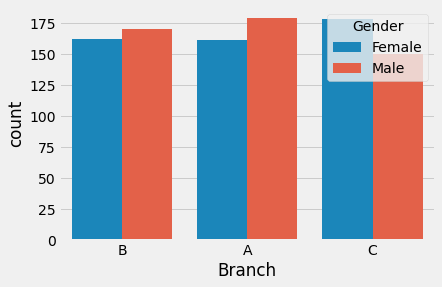

In [48]:
sns.countplot(x= 'Branch', hue= 'Gender', data = data)

#### There was more activity by the males in branch A while the female had more activity in branch C.

### Explore a countplot for the Payment and City Column



<AxesSubplot:xlabel='Payment', ylabel='count'>

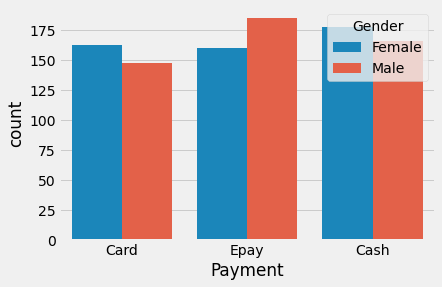

In [49]:
sns.countplot(x= 'Payment', hue= 'Gender', data = data)

<AxesSubplot:xlabel='City', ylabel='count'>

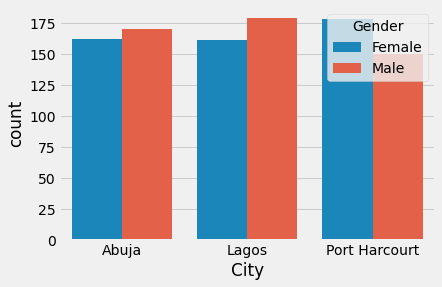

In [50]:
sns.countplot(x= 'City', hue= 'Gender', data = data)

### Determine the highest & lowest sold product line, using Countplot

Count Plot Tips- Set the Product line column to y-axis to prevent congestion on the x-axis

<AxesSubplot:xlabel='count', ylabel='Product line'>

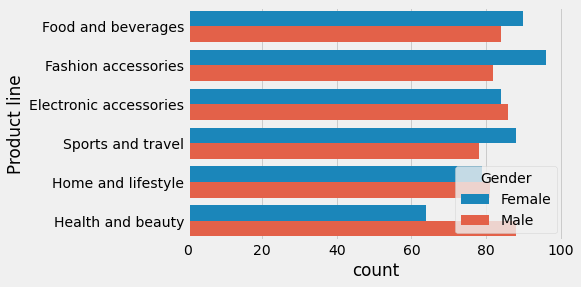

In [51]:
sns.countplot(y= 'Product line', hue= 'Gender', data = data)

### Determine the Payment channel used by most customer to pay for each product line. 
Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column.

<AxesSubplot:xlabel='count', ylabel='Product line'>

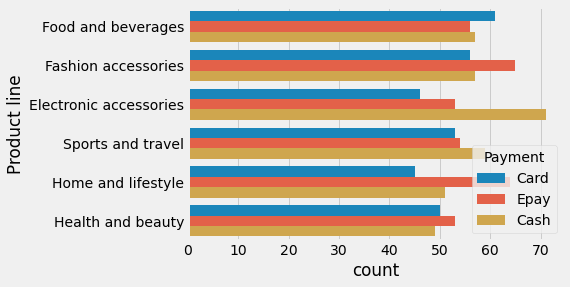

In [52]:
sns.countplot(y= 'Product line', hue= 'Payment', data = data)

### To determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

<AxesSubplot:xlabel='count', ylabel='Payment'>

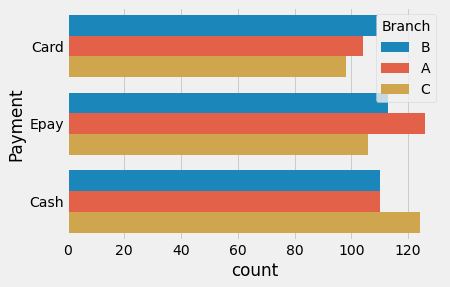

In [53]:
sns.countplot(y= 'Payment', hue= 'Branch', data = data)

<AxesSubplot:xlabel='City', ylabel='count'>

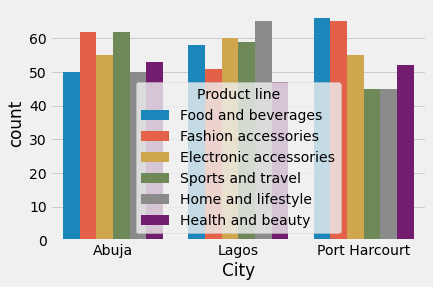

In [54]:
sns.countplot(x= 'City', hue= 'Product line', data = data)

Food And Beverages are sold most in Port-Harcourt.

Fashion accessories are also sold most in Port-Harcourt.

Lagos has the highest purchase for electronic equipments.

Sports and travel products were mostly sold at Abuja.

Home and lifestyle commoditites are heavily purchased in Lagos.

Abuja and Port Harcourt have an approximate equal number of sales for health and beauty commodities.

The supermarket should focus on increasing its marketing strategy for sales of health and beauty products especially in lagos which has high potential yield rate.

In other for the Branch at portharcourt to do better, the sales management should work on generating more incoming through sports and travel, home and lifestyle commodities.

More efforts need to be put in the Lagos fashion accessory fraction.

Relative to Lagos and Port Harcourt, Abuja branch hasn't been doing well sales wise as regards the yield in sales for the food and beverages, home and lifestyle. Hence, more attention should be given to these areas.

### Determine the branch with the lowest rating. This you can determine using a box plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot.

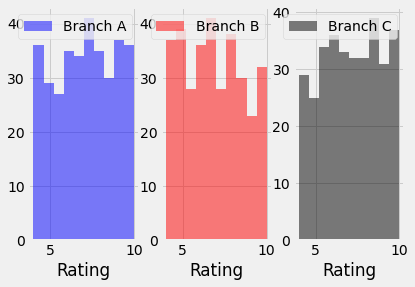

In [55]:
plt.subplot(1,3,1)
plt.hist('Rating', data=data[data['Branch']== 'A'], alpha=0.5, label='Branch A', color= 'blue')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.hist('Rating', data=data[data['Branch']== 'B'], alpha=0.5, label='Branch B', color= 'red')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(1,3,3)
plt.hist('Rating', data=data[data['Branch']== 'C'], alpha=0.5, label='Branch C', color= 'black')
plt.xlabel('Rating')
plt.legend(loc=0)

#### You can also use the method below:

<AxesSubplot:xlabel='Rating', ylabel='Branch'>

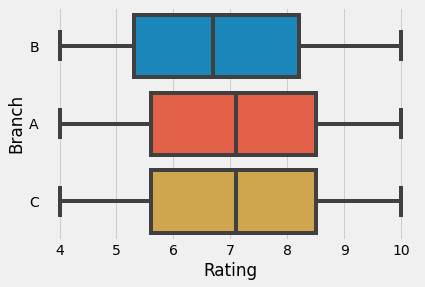

In [58]:
sns.boxplot(y = 'Branch', x = 'Rating', data=data)

### The branch with the lowest rating is Abuja Branch.

### The gender type often affects the kind of products being purchased at the supermarket.
•Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender.

### Set the aspect parameter to 4, so you can effectively space out each product line.
•Plot the same chart, but Total Column as the y-axis

•Write a summary of the insights you can pick from this chart.

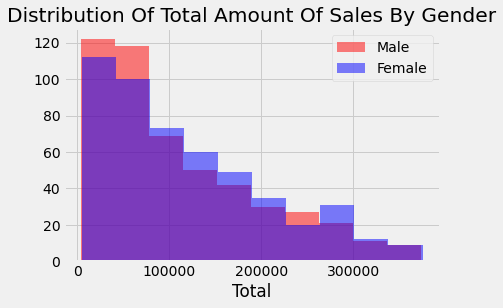

In [59]:
plt.hist('Total',data=data[data['Gender']=='Male'],alpha=0.5,label='Male',color='red')
plt.hist('Total',data=data[data['Gender']=='Female'],alpha=0.5,label='Female',color='blue')
plt.title('Distribution Of Total Amount Of Sales By Gender')
plt.xlabel('Total')
plt.legend(loc=0)

#### The chart above shows that the male gender is more in number. Both genders purchased specific goods more but the female gender spent more money.

#### You can also use this method below:

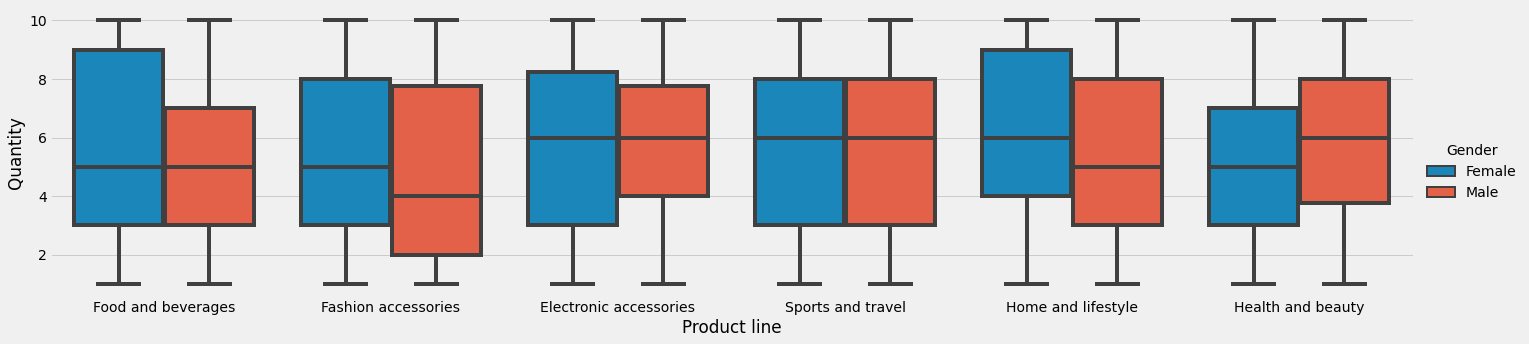

In [62]:
sns.catplot(x = 'Product line', y = 'Quantity', hue = 'Gender', kind= 'box', data=data, aspect=4.0)

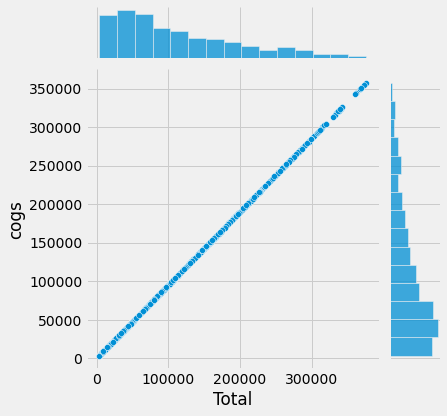

In [63]:
sns.jointplot(data['Total'],data['cogs'],data,kind='scatter')

### An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this:

Use the catplot() to plot Product line per unit price, and Product line per Quantity. Set the kind parameter to point. 

In a new cell, Write a summary of the insights you uncovered.

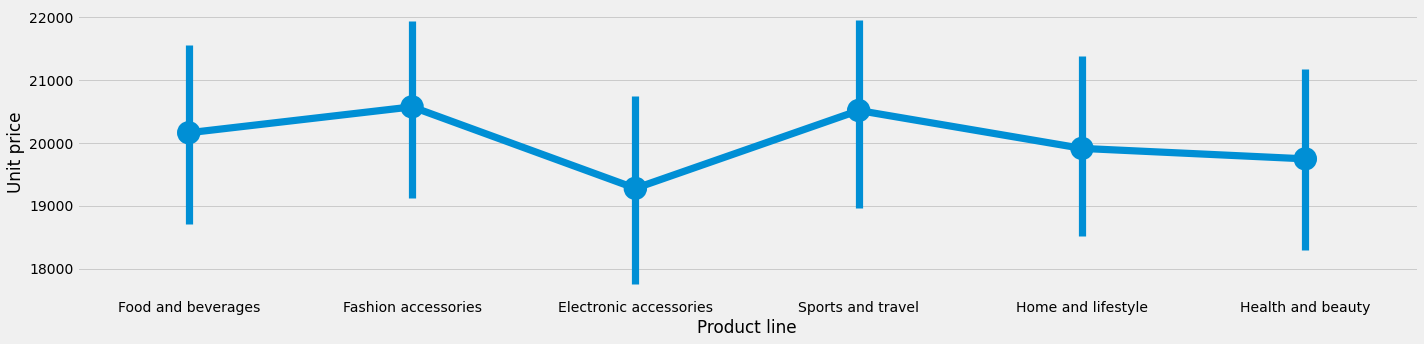

In [64]:
sns.catplot(y = 'Unit price', x = 'Product line', kind= 'point', data = data, aspect = 4)

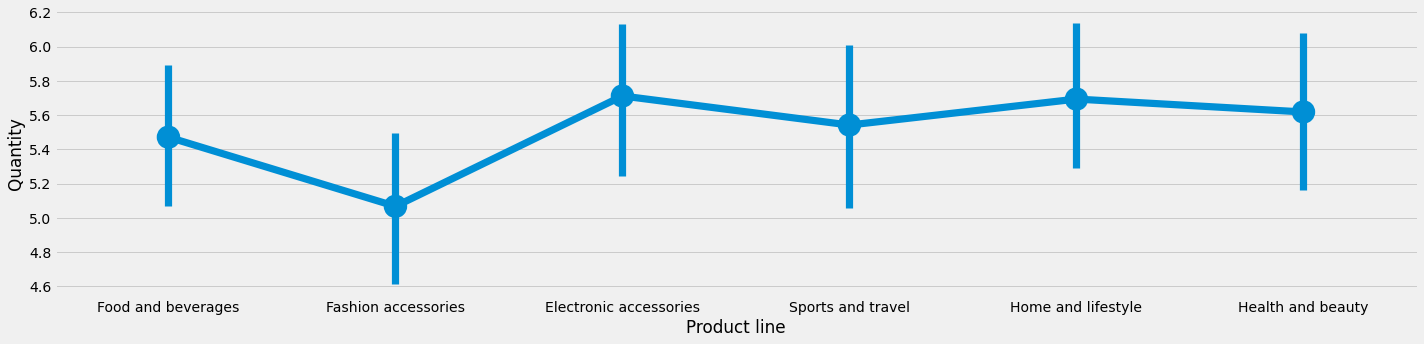

In [65]:
sns.catplot(y = 'Quantity', x = 'Product line', kind= 'point', data = data, aspect = 4)

### The chart above shows that: 

• Fashion accessories has the highest Unit price but lowest Quantity.

• Electronic accessories has the highest Quantity but lowest Unit price.

### Summary

In this project, we were able to perform various pandas funcions that help us analyze data including the Numpy, Matplotlib, Seaborn etc. Going through the data above, you could see there are other ways the task could be eplored and accomplished on pandas. This is one good factor about using pandas.

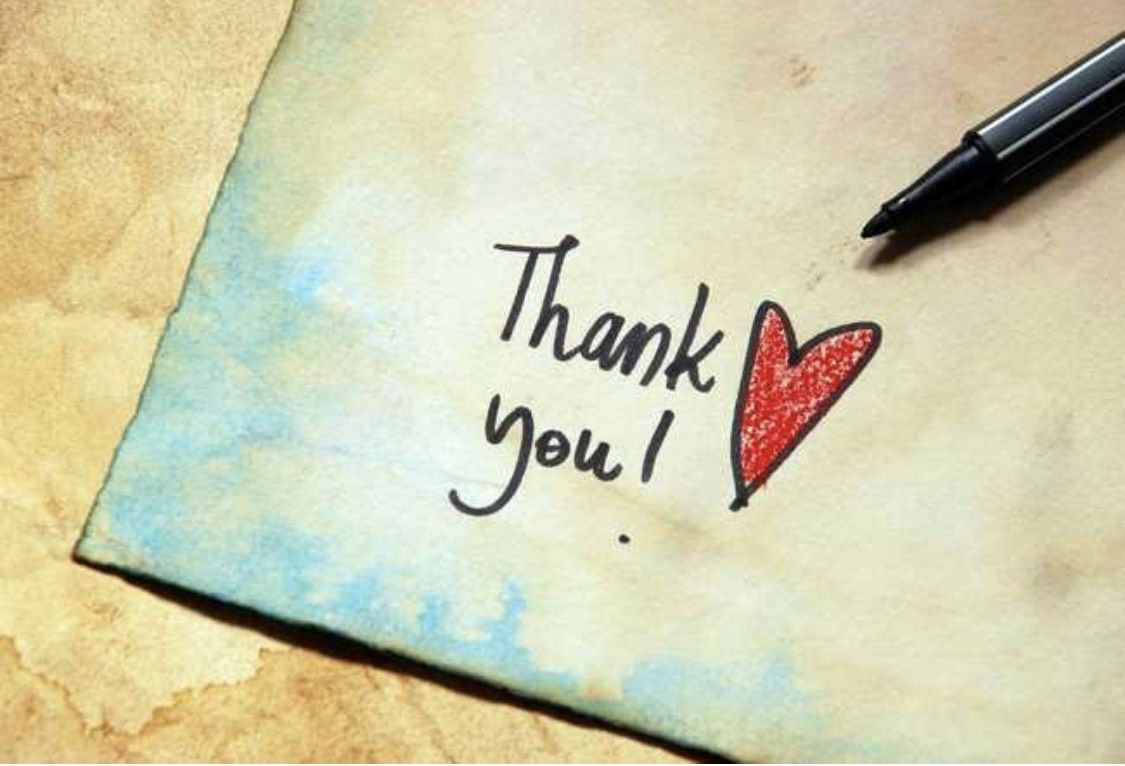